In [73]:
import numpy as np
import pandas as pd
import datetime as dt
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [15]:
StocksDF = pd.read_csv('TESLASTOCKS.csv')
StocksDF['Date'] = pd.to_datetime(StocksDF['Date'], dayfirst=True)

In [16]:
Percent_Change = [StocksDF["Percent Change"][i][:-1] for i in range(len(StocksDF["Percent Change"]))]
StocksDF = StocksDF.drop(columns = "Percent Change")
StocksDF["Percent Change"] = Percent_Change

In [38]:
TweetsDF = pd.read_csv('TWEETS.csv')
TweetsDF = TweetsDF.rename(columns = {'Timestamp':'Date'})
TweetsDF = TweetsDF.drop(['Emojis','Retweets','UserScreenName', 'UserName','Comments','Likes','Image link'],axis=1)
TweetsDF['Date'] = pd.to_datetime(TweetsDF['Date'], dayfirst=True)

In [65]:
df = pd.merge(StocksDF, TweetsDF, on = "Date")
df = df.drop_duplicates(subset='Date', keep = "first")
df.reset_index(drop=True, inplace=True)

In [66]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Percent Change,Tweet,text,Tweet URL
0,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500,0.628006,1,2992,Come work at the biggest & most advanced facto...,https://twitter.com/elonmusk/status/9484282744...
1,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000,-0.261997,0,2994,"Falcon Heavy goes vertical\n0:19\n2M views\n2,...",https://twitter.com/elonmusk/status/9490754750...
2,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000,3.955997,6,2996,"Long exposure of rocket ascent, reentry from s...",https://twitter.com/elonmusk/status/9504162449...
3,2018-01-09,67.031998,67.760002,65.480003,66.737999,66.737999,35733000,0.356003,1,2998,Replying to \n@PPathole\n @Tesla\n and 2 other...,https://twitter.com/elonmusk/status/9506003636...
4,2018-01-12,67.725998,68.082001,66.734001,67.244003,67.244003,24125500,-0.879997,-1,3006,Replying to \n@ID_AA_Carmack\n and \n@Danielle...,https://twitter.com/elonmusk/status/9518938946...


In [78]:
df["Percent Change"] = [float(i) for i in df["Percent Change"]]

In [76]:
"""
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub(r'RT[\s]+', '', text)  # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Removing hyperlink
df["text"] = df["text"].apply(cleanTxt)
"""

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ff/g92mc5sn1qj8knmdc1kc6x2r0000gn/T/ipykernel_2466/221476712.py:1: SyntaxWarning: invalid escape sequence '\s'
  """


'\ndef cleanTxt(text):\n    text = re.sub(\'@[A-Za-z0–9]+\', \'\', text) #Removing @mentions\n    text = re.sub(\'#\', \'\', text) # Removing \'#\' hash tag\n    text = re.sub(r\'RT[\\s]+\', \'\', text)  # Removing RT\n    text = re.sub(r\'https?:\\/\\/\\S+\', \'\', text)  # Removing hyperlink\ndf["text"] = df["text"].apply(cleanTxt)\n'

In [67]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Percent Change,Tweet,text,Tweet URL
0,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500,0.628006,1,2992,Come work at the biggest & most advanced facto...,https://twitter.com/elonmusk/status/9484282744...
1,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000,-0.261997,0,2994,"Falcon Heavy goes vertical\n0:19\n2M views\n2,...",https://twitter.com/elonmusk/status/9490754750...
2,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000,3.955997,6,2996,"Long exposure of rocket ascent, reentry from s...",https://twitter.com/elonmusk/status/9504162449...
3,2018-01-09,67.031998,67.760002,65.480003,66.737999,66.737999,35733000,0.356003,1,2998,Replying to \n@PPathole\n @Tesla\n and 2 other...,https://twitter.com/elonmusk/status/9506003636...
4,2018-01-12,67.725998,68.082001,66.734001,67.244003,67.244003,24125500,-0.879997,-1,3006,Replying to \n@ID_AA_Carmack\n and \n@Danielle...,https://twitter.com/elonmusk/status/9518938946...
...,...,...,...,...,...,...,...,...,...,...,...,...
894,2022-02-25,809.229980,819.500000,782.400024,809.869995,809.869995,25355900,17.020020,2,12150,Replying to \n@Gfilche\nHollywood refuses to w...,https://twitter.com/elonmusk/status/1497102152...
895,2022-03-01,869.679993,889.880005,853.780029,864.369995,864.369995,24922300,13.020020,1,12194,Replying to \n@DriveTeslaca\nDepends on what i...,https://twitter.com/elonmusk/status/1498495077...
896,2022-03-02,872.130005,886.479980,844.270020,879.890015,879.890015,24881100,-3.400025,0,12172,Replying to \n@JoeBiden\nTesla has created ove...,https://twitter.com/elonmusk/status/1498858611...
897,2022-03-03,878.770020,886.440002,832.599976,839.289978,839.289978,20541200,-0.039978,0,12170,Important warning: Starlink is the only non-Ru...,https://twitter.com/elonmusk/status/1499472139...


In [68]:
sentiment = SentimentIntensityAnalyzer()

In [69]:
positive = [sentiment.polarity_scores(i)["pos"] for i in df["text"]]
neutral = [sentiment.polarity_scores(i)["neu"] for i in df["text"]]
negative = [sentiment.polarity_scores(i)["neg"] for i in df["text"]]
compound = [sentiment.polarity_scores(i)["compound"] for i in df["text"]]

In [70]:
df["Positive"] = positive
df["Neutral"] = neutral
df["Negative"] = negative
df["Compound"] = compound

In [71]:
inTesla = []
for i in df["text"]:
    if "TESLA" in i.upper():
        inTesla.append(1)
    else:
        inTesla.append(0)
df["TESLA"] = inTesla

In [72]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Percent Change,Tweet,text,Tweet URL,Positive,Neutral,Negative,Compound,TESLA
0,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500,0.628006,1,2992,Come work at the biggest & most advanced facto...,https://twitter.com/elonmusk/status/9484282744...,0.250,0.750,0.0,0.8997,1
1,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000,-0.261997,0,2994,"Falcon Heavy goes vertical\n0:19\n2M views\n2,...",https://twitter.com/elonmusk/status/9490754750...,0.000,1.000,0.0,0.0000,0
2,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000,3.955997,6,2996,"Long exposure of rocket ascent, reentry from s...",https://twitter.com/elonmusk/status/9504162449...,0.133,0.867,0.0,0.3818,0
3,2018-01-09,67.031998,67.760002,65.480003,66.737999,66.737999,35733000,0.356003,1,2998,Replying to \n@PPathole\n @Tesla\n and 2 other...,https://twitter.com/elonmusk/status/9506003636...,0.000,1.000,0.0,0.0000,1
4,2018-01-12,67.725998,68.082001,66.734001,67.244003,67.244003,24125500,-0.879997,-1,3006,Replying to \n@ID_AA_Carmack\n and \n@Danielle...,https://twitter.com/elonmusk/status/9518938946...,0.233,0.767,0.0,0.8705,0


In [91]:
df.to_csv("Final Data.csv")

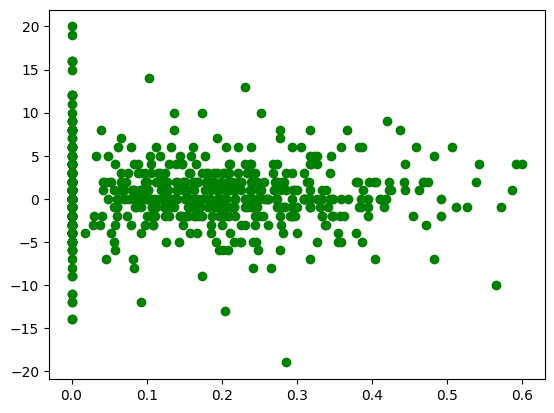

In [90]:
plt.scatter(x=df["Positive"], y=df["Percent Change"], color = "green")

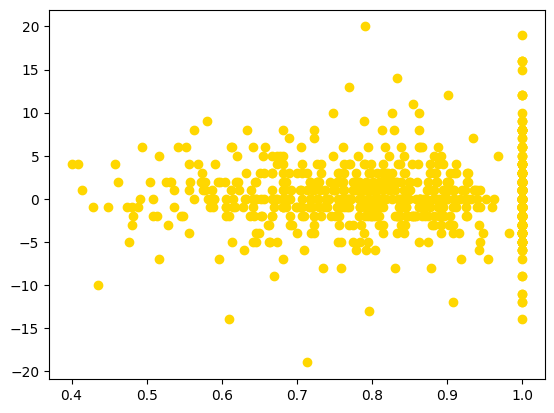

In [87]:
plt.scatter(x=df["Neutral"], y=df["Percent Change"], color="gold")

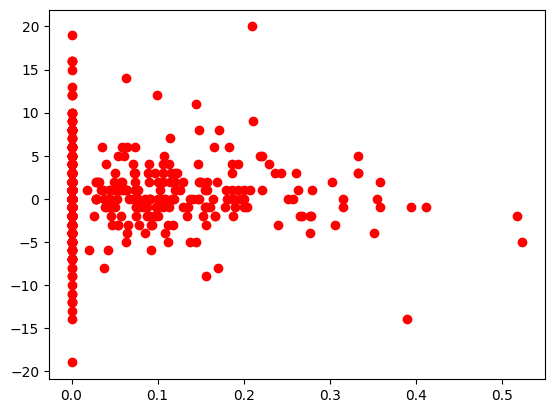

In [88]:
plt.scatter(x=df["Negative"], y=df["Percent Change"], color="red")

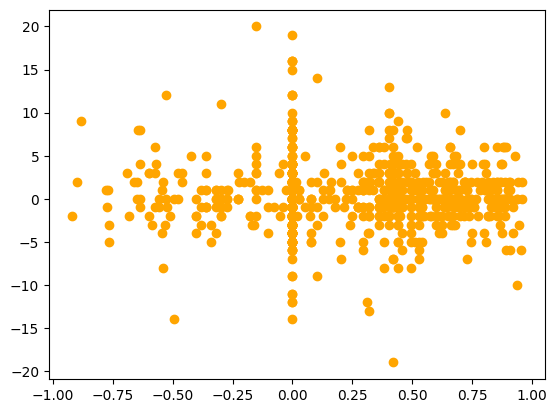

In [89]:
plt.scatter(x=df["Compound"], y=df["Percent Change"], color="orange")

In [79]:
type(df["Percent Change"][0])

numpy.float64